# Microsoft Movie Industry Analysis
## Author: Jonah Devoy

## Overview

For my exploratory data analysis project, I have been tasked with using exploratory data analysis to generate insights for business stakeholders. My goal for this project was to investigate what genre of films is the most profitable and deliver these findings to Microsoft's new movie studio executives. The analysis results, shown by visualizations and descriptive statistics revealed the most profitable movie genres and recommended the best directors to hire for each genre. Microsoft's new movie studio can use my report to produce movies that accumulate the highest profit and tailor those movies to specific genres and what directors are the best to use for each of those selected genres. 

## Business Problem

It was brought to my attention that Microsoft has noticed other big enterprises creating original video content and they would like to enter the exciting world of movie-making with their new movie studio. One problem is that Microsoft is uncertain of where to start. I have been recruited with exploring what types of films Microsofts new movie studio should produce to be successful. Using my findings I transformed those results into actionable insights so that Microsoft's new movie studio will have direction to be profitable. To aid Microsofts studio, I looked at the highest-profiting genre of movies, which genre of movies should be produced, and what directors to use for the selected genres. The three factors I based my analysis on are: 
* What movie genres produce the highest profits? 
* What movie genres should be produced to avoid competition? 
* What director should be hired to produce their movies? 

## Data Understanding

I used two data sources for my analysis to determine the best recommendations for Microsofts new movie studio. 
* tn.movie_budgets.csv: This compressed csv was extracted from the zipped data folder provided in the dsc-phase-1-project-v2-4.git Github repository located at https://github.com/learn-co-curriculum/dsc-phase-1-project-v2-4.git. I forked the repository and extracted all the files to my local machine where I could work on the tn.movie_budgets.csv on my local machine's Jupyter Notebook. 
* imdb_top_1000.csv: This data set is taken from Kaggles EDA on IMDB Movies Dataset located at https://www.kaggle.com/code/harshitshankhdhar/eda-on-imdb-movies-dataset/notebook. I downloaded the data to my local machine and moved the csv file to the zipped data folder with the rest of the given csv files. I chose to utilize this data set because of the information it gave such as movie directors, top four stars per movie, and gross income of the movie. 

## Data Preparation


In [1]:
# Importing the proper packages to prepare my data for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval 
from collections import Counter

In [2]:
# Imported the data file path
data = pd.read_csv('/Users/jdapeman/Documents/Flatiron/Microsoft_Movie_Analysis/phase_v1_project/zippedData/imdb_top_1000.csv')

In [3]:
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


### Renaming the column titles and droping column Poster_Link and Overview
### data columns key:
 
* Movie_Title: Name of the movie
* Year_released: Year at which that movie released
* Certificate_Grade: Certificate earned by that movie
* Runtime: Total runtime of the movie
* Genre: Genre of the movie
* IMDB_Rating: Rating of the movie at IMDB site
* Meta_score: Score earned by the movie
* Director: Name of the Director
* Star1,2,3,4: Name of the Stars
* Vote_Count: Total number of votes
* Gross: Money earned by that movie

In [4]:
data.rename(columns={"Series_Title": "Movie_Title", "Released_Year": "Year_released",
"Certificate": "Certificate_Grade", "No_of_Votes": "Vote_Count"}, inplace=True)

In [5]:
# Removing unecessary columns
data = data.drop('Poster_Link', axis=1) 
data = data.drop('Overview', axis=1) 

In [6]:
data.head()

,Movie_Title,Year_released,Certificate_Grade,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,Vote_Count,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie_Title        1000 non-null   object 
 1   Year_released      1000 non-null   object 
 2   Certificate_Grade  899 non-null    object 
 3   Runtime            1000 non-null   object 
 4   Genre              1000 non-null   object 
 5   IMDB_Rating        1000 non-null   float64
 6   Meta_score         843 non-null    float64
 7   Director           1000 non-null   object 
 8   Star1              1000 non-null   object 
 9   Star2              1000 non-null   object 
 10  Star3              1000 non-null   object 
 11  Star4              1000 non-null   object 
 12  Vote_Count         1000 non-null   int64  
 13  Gross              831 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 109.5+ KB


In [8]:
# Changing the 'Gross' column datatype from a object to an int64 and NAN to the integer 0.
data['Gross'] = data['Gross'].str.replace(',', '')
data['Gross'] = data['Gross'].replace(np.nan, 0)
data['Gross'] = data['Gross'].astype('int64')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie_Title        1000 non-null   object 
 1   Year_released      1000 non-null   object 
 2   Certificate_Grade  899 non-null    object 
 3   Runtime            1000 non-null   object 
 4   Genre              1000 non-null   object 
 5   IMDB_Rating        1000 non-null   float64
 6   Meta_score         843 non-null    float64
 7   Director           1000 non-null   object 
 8   Star1              1000 non-null   object 
 9   Star2              1000 non-null   object 
 10  Star3              1000 non-null   object 
 11  Star4              1000 non-null   object 
 12  Vote_Count         1000 non-null   int64  
 13  Gross              1000 non-null   int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 109.5+ KB


In [10]:
# Here I replaced all 'Gross' values equaling zero with the median gross. I chose the median as a relplacement
# because there were only 169 0 values and imputating the median is more robust than replacing 0 values with 
# the mean.

data['Gross'].median()

10702751.5

In [11]:
data.loc[data['Gross'] == 0, 'Gross'] = 10702752

In [12]:
data.sort_values(by=['Movie_Title'], inplace=True)

In [13]:
data.head()

,Movie_Title,Year_released,Certificate_Grade,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,Vote_Count,Gross
754,(500) Days of Summer,2009,UA,95 min,"Comedy, Drama, Romance",7.7,76.0,Marc Webb,Zooey Deschanel,Joseph Gordon-Levitt,Geoffrey Arend,Chloë Grace Moretz,472242,32391374
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
215,12 Years a Slave,2013,A,134 min,"Biography, Drama, History",8.1,96.0,Steve McQueen,Chiwetel Ejiofor,Michael Kenneth Williams,Michael Fassbender,Brad Pitt,640533,56671993
84,1917,2019,R,119 min,"Drama, Thriller, War",8.3,78.0,Sam Mendes,Dean-Charles Chapman,George MacKay,Daniel Mays,Colin Firth,425844,159227644
114,2001: A Space Odyssey,1968,U,149 min,"Adventure, Sci-Fi",8.3,84.0,Stanley Kubrick,Keir Dullea,Gary Lockwood,William Sylvester,Daniel Richter,603517,56954992


In [14]:
# I imported data from tn.movie_budgets.csv specifically for the 'production_budget' column
df_budgets = pd.read_csv('/Users/jdapeman/Documents/Flatiron/Microsoft_Movie_Analysis/phase_v1_project/zippedData/tn.movie_budgets.csv')

In [15]:
# Sorting values by movie name and renaming the column 'movie' to match 'Movie_Title'
df_budgets.sort_values(by=['movie'], inplace=True)
df_budgets.rename(columns = {'movie' : 'Movie_Title'}, inplace=True)

In [16]:
df_budgets.head()

,id,release_date,Movie_Title,production_budget,domestic_gross,worldwide_gross
5115,16,"Nov 20, 2015",#Horror,"$1,500,000",$0,$0
3954,55,"Jul 17, 2009",(500) Days of Summer,"$7,500,000","$32,425,665","$34,439,060"
4253,54,"Mar 11, 2016",10 Cloverfield Lane,"$5,000,000","$72,082,999","$108,286,422"
3447,48,"Nov 11, 2015",10 Days in a Madhouse,"$12,000,000","$14,616","$14,616"
3262,63,"Mar 31, 1999",10 Things I Hate About You,"$13,000,000","$38,177,966","$60,413,950"


In [17]:
# Math operations cannot be done on the prodcution_budget, domestic_gross, or worldwide_gross columns because
# they are strings. Here I stripped them of $ and thier commas, allowing me to change the datatype from a 
# string to an int
df_budgets['production_budget'] = df_budgets['production_budget'].str.replace(r'$', '')
df_budgets['production_budget'] = df_budgets['production_budget'].str.replace(r',', '')
df_budgets['production_budget'] = df_budgets['production_budget'].astype(int)

/var/folders/yd/tybxdv4901xbv_l8x4p1g7tm0000gn/T/ipykernel_5588/1597661293.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_budgets['production_budget'] = df_budgets['production_budget'].str.replace(r'$', '')


In [18]:
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].str.replace(r'$', '')
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].str.replace(r',', '')
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].astype(int)

/var/folders/yd/tybxdv4901xbv_l8x4p1g7tm0000gn/T/ipykernel_5588/3544728917.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_budgets['domestic_gross'] = df_budgets['domestic_gross'].str.replace(r'$', '')


In [19]:
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].str.replace(r'$', '')
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].str.replace(r',', '')
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].astype(int)

/var/folders/yd/tybxdv4901xbv_l8x4p1g7tm0000gn/T/ipykernel_5588/1886919089.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].str.replace(r'$', '')


In [20]:
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 5115 to 2701
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   Movie_Title        5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 316.2+ KB


In [21]:
# I combined the two dataframes, data and df_budgets. For my perameters I chose inner, left_on, and right_on 
# 'Movie_title' because I wanted to keep the titles from both data sets
profit_per_cat_data = pd.merge(data, df_budgets, left_on = 'Movie_Title', right_on = 'Movie_Title', how = 'inner')
profit_per_cat_data.head()

,Movie_Title,Year_released,Certificate_Grade,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,Vote_Count,Gross,id,release_date,production_budget,domestic_gross,worldwide_gross
0,(500) Days of Summer,2009,UA,95 min,"Comedy, Drama, Romance",7.7,76.0,Marc Webb,Zooey Deschanel,Joseph Gordon-Levitt,Geoffrey Arend,Chloë Grace Moretz,472242,32391374,55,"Jul 17, 2009",7500000,32425665,34439060
1,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,36,"Apr 13, 1957",340000,0,0
2,12 Years a Slave,2013,A,134 min,"Biography, Drama, History",8.1,96.0,Steve McQueen,Chiwetel Ejiofor,Michael Kenneth Williams,Michael Fassbender,Brad Pitt,640533,56671993,18,"Oct 18, 2013",20000000,56671993,181025343
3,2001: A Space Odyssey,1968,U,149 min,"Adventure, Sci-Fi",8.3,84.0,Stanley Kubrick,Keir Dullea,Gary Lockwood,William Sylvester,Daniel Richter,603517,56954992,27,"Apr 2, 1968",10500000,59936321,71928046
4,21 Grams,2003,UA,124 min,"Crime, Drama, Thriller",7.6,70.0,Alejandro G. Iñárritu,Sean Penn,Benicio Del Toro,Naomi Watts,Danny Huston,224545,16290476,13,"Nov 21, 2003",20000000,16248701,59667625


In [22]:
profit_per_cat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521 entries, 0 to 520
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie_Title        521 non-null    object 
 1   Year_released      521 non-null    object 
 2   Certificate_Grade  511 non-null    object 
 3   Runtime            521 non-null    object 
 4   Genre              521 non-null    object 
 5   IMDB_Rating        521 non-null    float64
 6   Meta_score         503 non-null    float64
 7   Director           521 non-null    object 
 8   Star1              521 non-null    object 
 9   Star2              521 non-null    object 
 10  Star3              521 non-null    object 
 11  Star4              521 non-null    object 
 12  Vote_Count         521 non-null    int64  
 13  Gross              521 non-null    int64  
 14  id                 521 non-null    int64  
 15  release_date       521 non-null    object 
 16  production_budget  521 non

In [23]:
# Dropping rows with zero value for 'domestic_gross'. There are five zero values to be filtered out.
profit_per_cat_data = profit_per_cat_data[profit_per_cat_data['domestic_gross'] > 1]

In [24]:
# I created a column titled 'Total_Domestic_Gross', consisting of the average of the 'Gross' and 
# 'domestic_gross' columns
profit_per_cat_data['Total_Domestic_Gross'] = (profit_per_cat_data['Gross'] + profit_per_cat_data['domestic_gross'])/2
profit_per_cat_data.head()

,Movie_Title,Year_released,Certificate_Grade,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,Vote_Count,Gross,id,release_date,production_budget,domestic_gross,worldwide_gross,Total_Domestic_Gross
0,(500) Days of Summer,2009,UA,95 min,"Comedy, Drama, Romance",7.7,76.0,Marc Webb,Zooey Deschanel,Joseph Gordon-Levitt,Geoffrey Arend,Chloë Grace Moretz,472242,32391374,55,"Jul 17, 2009",7500000,32425665,34439060,32408519.5
2,12 Years a Slave,2013,A,134 min,"Biography, Drama, History",8.1,96.0,Steve McQueen,Chiwetel Ejiofor,Michael Kenneth Williams,Michael Fassbender,Brad Pitt,640533,56671993,18,"Oct 18, 2013",20000000,56671993,181025343,56671993.0
3,2001: A Space Odyssey,1968,U,149 min,"Adventure, Sci-Fi",8.3,84.0,Stanley Kubrick,Keir Dullea,Gary Lockwood,William Sylvester,Daniel Richter,603517,56954992,27,"Apr 2, 1968",10500000,59936321,71928046,58445656.5
4,21 Grams,2003,UA,124 min,"Crime, Drama, Thriller",7.6,70.0,Alejandro G. Iñárritu,Sean Penn,Benicio Del Toro,Naomi Watts,Danny Huston,224545,16290476,13,"Nov 21, 2003",20000000,16248701,59667625,16269588.5
5,25th Hour,2002,R,135 min,Drama,7.6,68.0,Spike Lee,Edward Norton,Barry Pepper,Philip Seymour Hoffman,Rosario Dawson,169708,13060843,29,"Dec 19, 2002",4500000,13084595,25344490,13072719.0


In [25]:
# From here I dropped the Gross, domestic_gross, and id columns
profit_per_cat_data = profit_per_cat_data.drop('Gross', axis=1)

In [26]:
profit_per_cat_data = profit_per_cat_data.drop('domestic_gross', axis=1)

In [27]:
profit_per_cat_data = profit_per_cat_data.drop('id', axis=1)

In [28]:
profit_per_cat_data.columns

Index(['Movie_Title', 'Year_released', 'Certificate_Grade', 'Runtime', 'Genre',
       'IMDB_Rating', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
       'Star4', 'Vote_Count', 'release_date', 'production_budget',
       'worldwide_gross', 'Total_Domestic_Gross'],
      dtype='object')

In [29]:
# Now we can make a profit column
profit_per_cat_data['Profit'] = profit_per_cat_data['worldwide_gross'] - profit_per_cat_data['production_budget']

In [30]:
profit_per_cat_data.columns

Index(['Movie_Title', 'Year_released', 'Certificate_Grade', 'Runtime', 'Genre',
       'IMDB_Rating', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
       'Star4', 'Vote_Count', 'release_date', 'production_budget',
       'worldwide_gross', 'Total_Domestic_Gross', 'Profit'],
      dtype='object')

In [31]:
# Seperating the genre types in the 'Genre' column
profit_per_cat_data['Genre'] = profit_per_cat_data['Genre'].str.strip('()').str.split(',')

In [33]:
profit_per_cat_data = profit_per_cat_data.explode('Genre')

In [34]:
profit_per_cat_data.head()

,Movie_Title,Year_released,Certificate_Grade,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,Vote_Count,release_date,production_budget,worldwide_gross,Total_Domestic_Gross,Profit
0,(500) Days of Summer,2009,UA,95 min,Comedy,7.7,76.0,Marc Webb,Zooey Deschanel,Joseph Gordon-Levitt,Geoffrey Arend,Chloë Grace Moretz,472242,"Jul 17, 2009",7500000,34439060,32408519.5,26939060
0,(500) Days of Summer,2009,UA,95 min,Drama,7.7,76.0,Marc Webb,Zooey Deschanel,Joseph Gordon-Levitt,Geoffrey Arend,Chloë Grace Moretz,472242,"Jul 17, 2009",7500000,34439060,32408519.5,26939060
0,(500) Days of Summer,2009,UA,95 min,Romance,7.7,76.0,Marc Webb,Zooey Deschanel,Joseph Gordon-Levitt,Geoffrey Arend,Chloë Grace Moretz,472242,"Jul 17, 2009",7500000,34439060,32408519.5,26939060
2,12 Years a Slave,2013,A,134 min,Biography,8.1,96.0,Steve McQueen,Chiwetel Ejiofor,Michael Kenneth Williams,Michael Fassbender,Brad Pitt,640533,"Oct 18, 2013",20000000,181025343,56671993.0,161025343
2,12 Years a Slave,2013,A,134 min,Drama,8.1,96.0,Steve McQueen,Chiwetel Ejiofor,Michael Kenneth Williams,Michael Fassbender,Brad Pitt,640533,"Oct 18, 2013",20000000,181025343,56671993.0,161025343


In [35]:
profit_per_cat_data['Genre'].value_counts()

 Drama        208
Drama         138
Action        106
 Adventure     89
 Thriller      73
Comedy         60
 Sci-Fi        58
Biography      56
 Romance       54
Adventure      49
Crime          48
 Comedy        47
 Crime         42
Animation      41
 Mystery       38
 Fantasy       31
 Family        30
 History       29
 War           21
 Sport         15
 Music         12
Horror         12
 Biography     11
 Action        10
 Western       10
 Horror         9
 Musical        7
 Film-Noir      4
Mystery         3
Western         2
Family          1
Name: Genre, dtype: int64

In [44]:
# There are double counts of genres becasue of whitespace attached to thier names. Lets remove the whitespace.
profit_per_cat_data['Genre'] = profit_per_cat_data['Genre'].str.strip()

In [45]:
profit_per_cat_data['Genre'].value_counts()

Drama        346
Adventure    138
Action       116
Comedy       107
Crime         90
Thriller      73
Biography     67
Sci-Fi        58
Romance       54
Mystery       41
Animation     41
Fantasy       31
Family        31
History       29
Horror        21
War           21
Sport         15
Music         12
Western       12
Musical        7
Film-Noir      4
Name: Genre, dtype: int64

In [69]:
# There is a 'PG' value in the 'Year_relesed' column for the movie Apollo 13. Lets change that to 1999, then
# change the year from a string to an integer. 
profit_per_cat_data.loc[profit_per_cat_data['Year_released'] == 'PG', 'Year_released'] = 1995

In [71]:
profit_per_cat_data[profit_per_cat_data['Year_released'] == 'PG'].value_counts()

Series([], dtype: int64)

In [72]:
profit_per_cat_data['Year_released'] = profit_per_cat_data['Year_released'].astype(int)

In [73]:
# Finding what movies are relased after 1999 
saturation_data = profit_per_cat_data[profit_per_cat_data['Year_released'] > 1999]

In [74]:
saturation_data_v2 = saturation_data[['Year_released', 'Genre']].copy()

In [75]:
saturation_data_v2

,Year_released,Genre
0,2009,Comedy
0,2009,Drama
0,2009,Romance
2,2013,Biography
2,2013,Drama
...,...,...
518,2016,Adventure
518,2016,Comedy
520,2006,Drama
520,2006,Thriller


In [82]:
# Creating a table of the top 5 profiable movies to check for oversaturation in the mmarket.
saturation_data_v3 = saturation_data_v2[(saturation_data_v2['Genre'] == "Adventure") | (saturation_data_v2['Genre'] == "Action") |
                  (saturation_data_v2['Genre'] == "Family") | (saturation_data_v2['Genre'] == "Fantasy") |
                  (saturation_data_v2['Genre'] == "Animation")]

In [95]:
saturation_data_v3

,Year_released,Genre
6,2006,Action
7,2007,Action
15,2013,Fantasy
23,2000,Adventure
32,2006,Action
...,...,...
514,2014,Adventure
517,2009,Adventure
517,2009,Fantasy
518,2016,Animation


In [190]:
#Top directors for movies after the 21st century
directors = profit_per_cat_data[profit_per_cat_data['Year_released'] > 1999]

In [191]:
directors_v2 = directors[['Year_released', 'Genre', 'Director', 'Profit']].copy()

In [192]:
directors_v3 = directors_v2[(directors_v2['Genre'] == "Adventure") | (directors_v2['Genre'] == "Action") |
                  (directors_v2['Genre'] == "Family") | (directors_v2['Genre'] == "Fantasy") |
                  (directors_v2['Genre'] == "Animation")]

In [193]:
directors_v3

,Year_released,Genre,Director,Profit
6,2006,Action,Zack Snyder,394161935
7,2007,Action,James Mangold,23171825
15,2013,Fantasy,Richard Curtis,77309178
23,2000,Adventure,Cameron Crowe,-12628809
32,2006,Action,Mel Gibson,81032272
...,...,...,...,...
514,2014,Adventure,Bryan Singer,547862775
517,2009,Adventure,Ruben Fleischer,78636596
517,2009,Fantasy,Ruben Fleischer,78636596
518,2016,Animation,Byron Howard,869429616


In [ ]:
b = directors_v3[directors_v3['Genre'] == 'Action']

In [238]:
b_v2 = b.sort_values(ascending=False, by=['Profit']).head()

In [239]:
b_v2

,Year_released,Genre,Director,Profit
37,2009,Action,James Cameron,2351345279
38,2018,Action,Anthony Russo,1748134200
374,2012,Action,Joss Whedon,1292935897
438,2003,Action,Peter Jackson,1047403341
207,2018,Action,Brad Bird,1042520711


In [243]:
c = directors_v3[directors_v3['Genre'] == 'Adventure']

In [244]:
c_v2 = c.sort_values(ascending=False, by=['Profit']).head()

In [245]:
c_v2

,Year_released,Genre,Director,Profit
37,2009,Adventure,James Cameron,2351345279
38,2018,Adventure,Anthony Russo,1748134200
374,2012,Adventure,Joss Whedon,1292935897
438,2003,Adventure,Peter Jackson,1047403341
207,2018,Adventure,Brad Bird,1042520711


In [246]:
d = directors_v3[directors_v3['Genre'] == 'Family']

In [247]:
d_v2 = d.sort_values(ascending=False, by=['Profit']).head()

In [248]:
d_v2 

,Year_released,Genre,Director,Profit
185,2005,Family,Mike Newell,747099794
186,2009,Family,David Yates,685213767
187,2004,Family,Alfonso Cuarón,666907323
94,2017,Family,Lee Unkrich,623008101
512,2017,Family,Stephen Chbosky,284604712


In [249]:
e = directors_v3[directors_v3['Genre'] == 'Fantasy']
e_v2 = e.sort_values(ascending=False, by=['Profit']).head()
e_v2

,Year_released,Genre,Director,Profit
37,2009,Fantasy,James Cameron,2351345279
417,2012,Fantasy,Peter Jackson,767003568
185,2005,Fantasy,Mike Newell,747099794
418,2013,Fantasy,Peter Jackson,710366855
187,2004,Fantasy,Alfonso Cuarón,666907323


In [250]:
f = directors_v3[directors_v3['Genre'] == 'Animation']
f_v2 = f.sort_values(ascending=False, by=['Profit']).head()
f_v2

,Year_released,Genre,Director,Profit
207,2018,Animation,Brad Bird,1042520711
518,2016,Animation,Byron Howard,869429616
495,2010,Animation,Lee Unkrich,868879522
147,2003,Animation,Andrew Stanton,842429370
211,2015,Animation,Pete Docter,679235992


In [251]:
to_concat = [b_v2, c_v2, d_v2, e_v2, f_v2]
new_director_list = pd.concat(to_concat)


In [252]:
new_director_list

,Year_released,Genre,Director,Profit
37,2009,Action,James Cameron,2351345279
38,2018,Action,Anthony Russo,1748134200
374,2012,Action,Joss Whedon,1292935897
438,2003,Action,Peter Jackson,1047403341
207,2018,Action,Brad Bird,1042520711
37,2009,Adventure,James Cameron,2351345279
38,2018,Adventure,Anthony Russo,1748134200
374,2012,Adventure,Joss Whedon,1292935897
438,2003,Adventure,Peter Jackson,1047403341
207,2018,Adventure,Brad Bird,1042520711


In [269]:
#Profitability of top 5 movies 
top_5_profits = profit_per_cat_data[(profit_per_cat_data['Genre'] == "Adventure") | (profit_per_cat_data['Genre'] == "Action") |
                  (profit_per_cat_data['Genre'] == "Family") | (profit_per_cat_data['Genre'] == "Fantasy") |
                  (profit_per_cat_data['Genre'] == "Animation")]

In [271]:
top_5_profits.head()

,Movie_Title,Year_released,Certificate_Grade,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,Vote_Count,release_date,production_budget,worldwide_gross,Total_Domestic_Gross,Profit
3,2001: A Space Odyssey,1968,U,149 min,Adventure,8.3,84.0,Stanley Kubrick,Keir Dullea,Gary Lockwood,William Sylvester,Daniel Richter,603517,"Apr 2, 1968",10500000,71928046,58445656.5,61428046
6,300,2006,A,117 min,Action,7.6,52.0,Zack Snyder,Gerard Butler,Lena Headey,David Wenham,Dominic West,732876,"Mar 9, 2007",60000000,454161935,210614939.0,394161935
7,3:10 to Yuma,2007,A,122 min,Action,7.7,76.0,James Mangold,Russell Crowe,Christian Bale,Ben Foster,Logan Lerman,288797,"Sep 7, 2007",48000000,71171825,53606916.0,23171825
10,A Christmas Story,1983,U,93 min,Family,7.9,77.0,Bob Clark,Peter Billingsley,Melinda Dillon,Darren McGavin,Scott Schwartz,132947,"Nov 18, 1983",3250000,20605209,20605209.0,17355209
15,About Time,2013,R,123 min,Fantasy,7.8,55.0,Richard Curtis,Domhnall Gleeson,Rachel McAdams,Bill Nighy,Lydia Wilson,303032,"Nov 1, 2013",12000000,89309178,15323421.0,77309178


## Data Analysis

After all the data has been assembled I plotted my visualizations to determine the relationships between the elements I was investigating and their relationships. Below are the visual descriptions of my three key questions:
* What movie genres produce the highest profits? 
* What movie genres should be produced to avoid competition? 
* What director should be hired to produce their movies? 

## Which genre of movies genreates the highest profit?

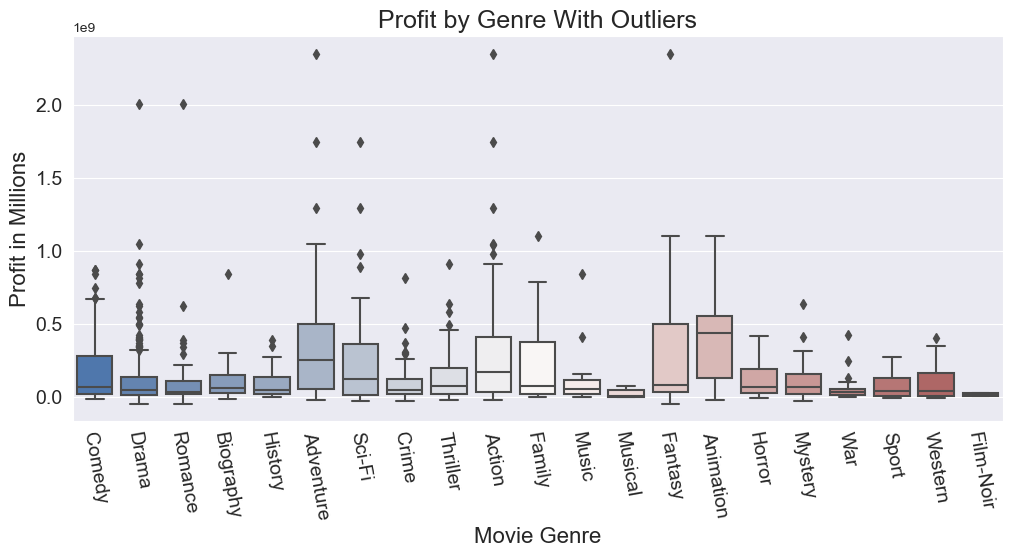

In [47]:
plt.figure(figsize=(12,5))
sns.set_style('darkgrid')
sns.boxplot(x='Genre', y='Profit', data=profit_per_cat_data, palette='vlag')
plt.xticks(rotation=-80)
plt.ylabel('Profit in Millions', fontsize=16)
plt.xlabel('Movie Genre', fontsize = 16)
plt.title('Profit by Genre With Outliers', fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

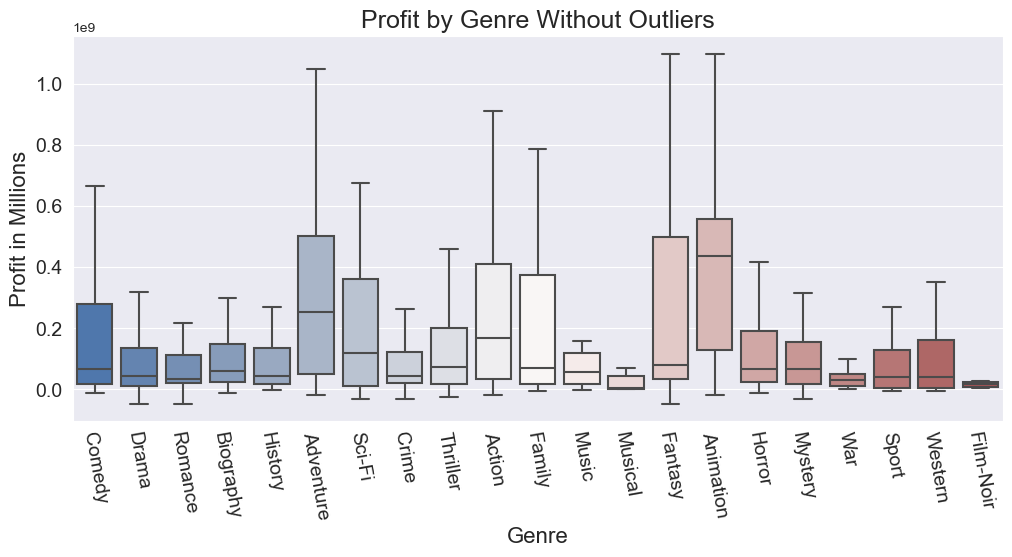

In [48]:
plt.figure(figsize=(12,5))
sns.set_style('darkgrid')
sns.boxplot(x='Genre', y='Profit', data=profit_per_cat_data, showfliers=False, palette='vlag')
plt.xticks(rotation=-80)
plt.ylabel('Profit in Millions', fontsize=16)
plt.xlabel('Genre', fontsize = 16)
plt.title('Profit by Genre Without Outliers', fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

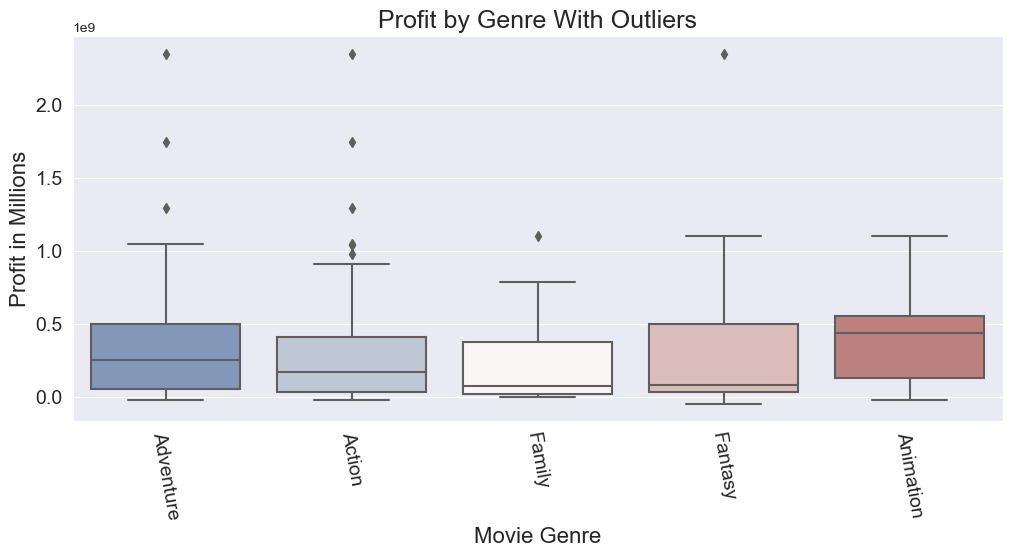

In [272]:
plt.figure(figsize=(12,5))
sns.set_style('darkgrid')
sns.boxplot(x='Genre', y='Profit', data=top_5_profits, palette='vlag')
plt.xticks(rotation=-80)
plt.ylabel('Profit in Millions', fontsize=16)
plt.xlabel('Movie Genre', fontsize = 16)
plt.title('Profit by Genre With Outliers', fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

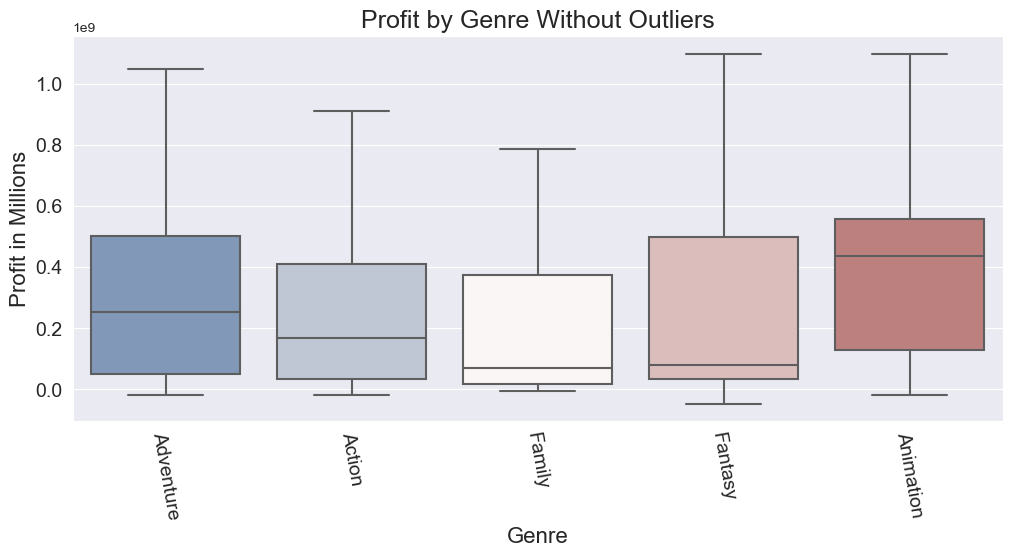

In [273]:
plt.figure(figsize=(12,5))
sns.set_style('darkgrid')
sns.boxplot(x='Genre', y='Profit', data=top_5_profits, showfliers=False, palette='vlag')
plt.xticks(rotation=-80)
plt.ylabel('Profit in Millions', fontsize=16)
plt.xlabel('Genre', fontsize = 16)
plt.title('Profit by Genre Without Outliers', fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

### The results indicate that the highest proffiting genres are Adventure, Action, Family, Fantasy and Animation.

### Lets take a quick look at IMDB rating for the movie genres.

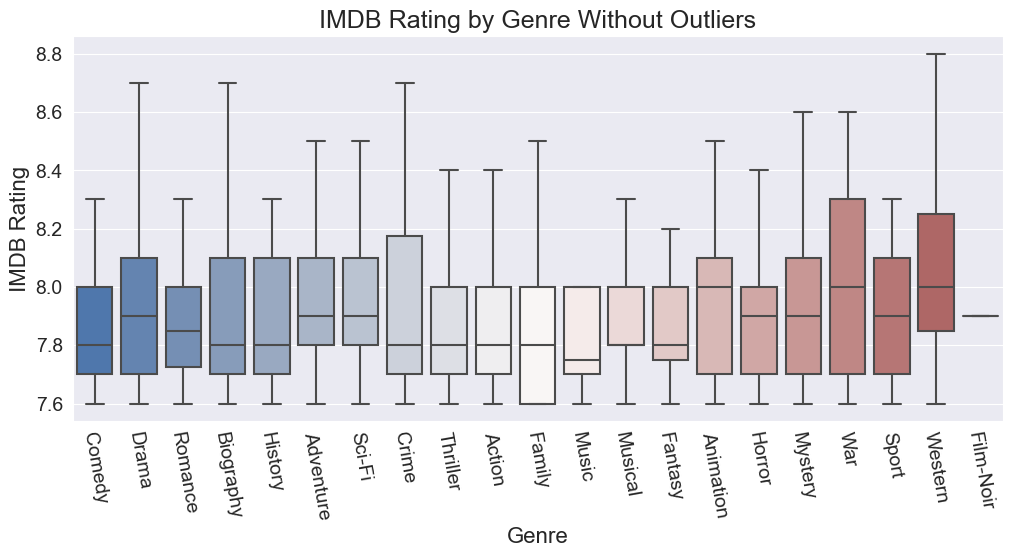

In [60]:
plt.figure(figsize=(12,5))
sns.set_style('darkgrid')
sns.boxplot(x='Genre', y='IMDB_Rating', data=profit_per_cat_data, showfliers=False, palette='vlag')
plt.xticks(rotation=-80)
plt.ylabel('IMDB Rating', fontsize=16)
plt.xlabel('Genre', fontsize = 16)
plt.title('IMDB Rating by Genre Without Outliers', fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

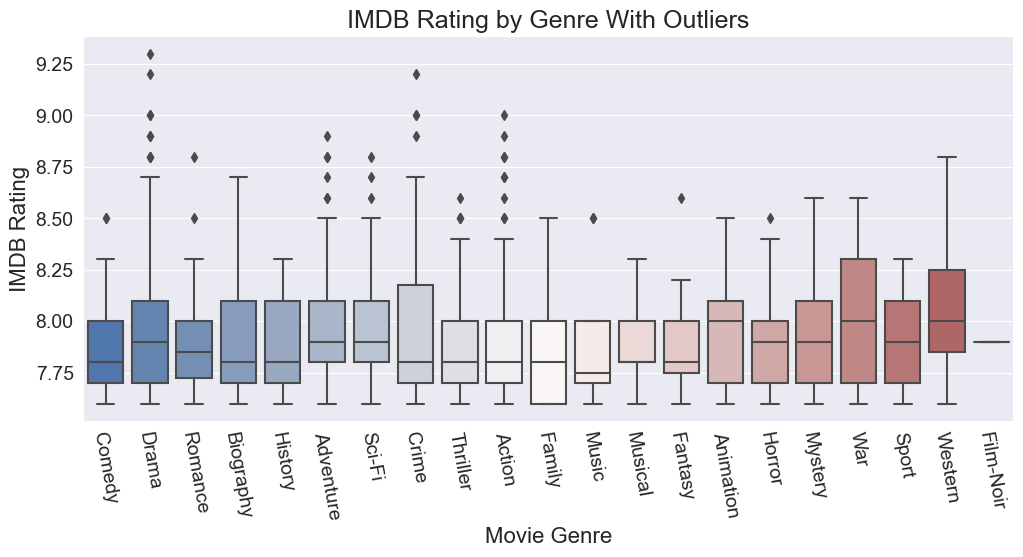

In [61]:
plt.figure(figsize=(12,5))
sns.set_style('darkgrid')
sns.boxplot(x='Genre', y='IMDB_Rating', data=profit_per_cat_data, palette='vlag')
plt.xticks(rotation=-80)
plt.ylabel('IMDB Rating', fontsize=16)
plt.xlabel('Movie Genre', fontsize = 16)
plt.title('IMDB Rating by Genre With Outliers', fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

### Is there any correlation between IMDB rating and Proffitability?

In [63]:
correlation_data = profit_per_cat_data[['Profit', 'IMDB_Rating']].copy()

<Axes: xlabel='IMDB_Rating', ylabel='Profit'>

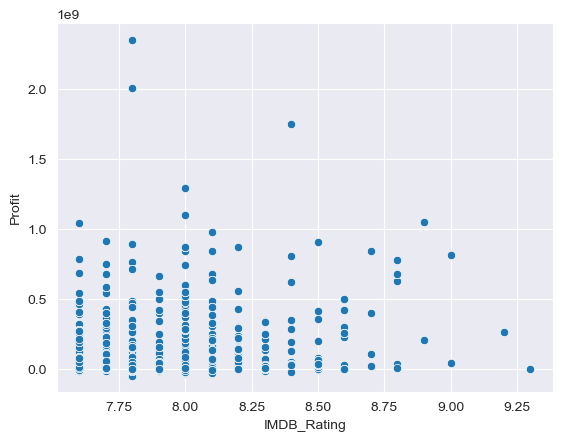

In [64]:
sns.scatterplot(data = correlation_data, x = 'IMDB_Rating', y = 'Profit')

In [65]:
correlation_data.corr()

,Profit,IMDB_Rating
Profit,1.000000,0.163062
IMDB_Rating,0.163062,1.000000


### From the results there seems to be little correlation between IMDB ratings and profit.

## Which of the 5 most popular genre of movies would stand out against competeing movie types?

Text(0.5, 1.0, 'Genre Count')

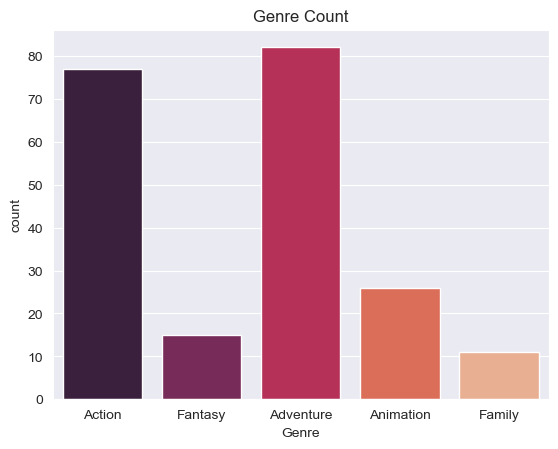

In [114]:
sns.countplot(x=saturation_data_v3['Genre'], palette='rocket').set_title("Genre Count")

### The results indicate that Action and Adventure are genres relased often in the 21st century. Fantasy
### Animation and Family are genred that are not oversaturated in the market.

## Who are the top five directors to hire for action, fantasy, adventure, animation, and 
## family movies?

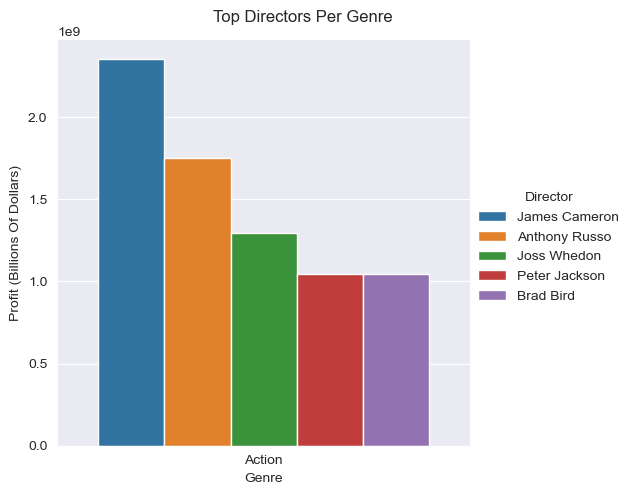

In [262]:
cat = sns.catplot(data=b_v2, x='Genre', y='Profit', hue='Director', kind="bar", palette='tab10')
cat.fig.subplots_adjust(top=0.92)
cat.fig.suptitle('Top Directors Per Genre')
cat.set_ylabels('Profit (Billions Of Dollars)')

plt.show()

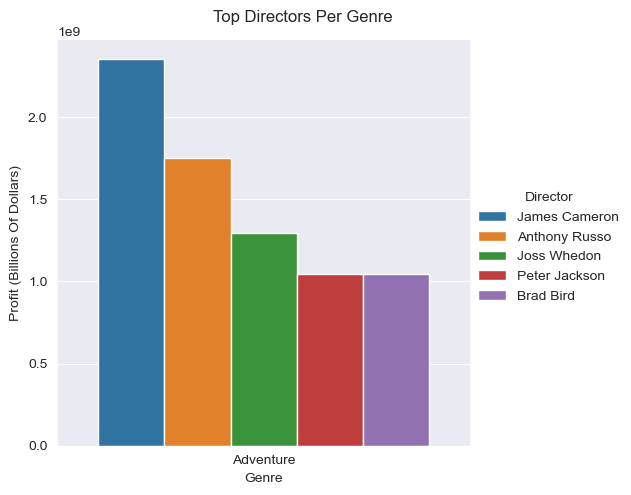

In [263]:
cat = sns.catplot(data=c_v2, x='Genre', y='Profit', hue='Director', kind="bar", palette='tab10')
cat.fig.subplots_adjust(top=0.92)
cat.fig.suptitle('Top Directors Per Genre')
cat.set_ylabels('Profit (Billions Of Dollars)')

plt.show()

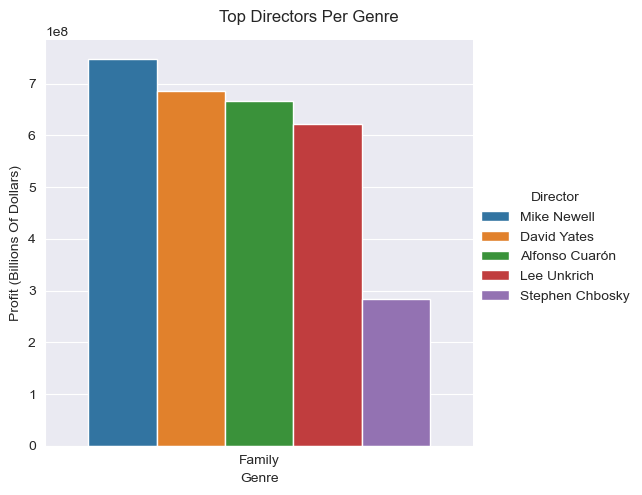

In [264]:
cat = sns.catplot(data=d_v2, x='Genre', y='Profit', hue='Director', kind="bar", palette='tab10')
cat.fig.subplots_adjust(top=0.92)
cat.fig.suptitle('Top Directors Per Genre')
cat.set_ylabels('Profit (Billions Of Dollars)')

plt.show()

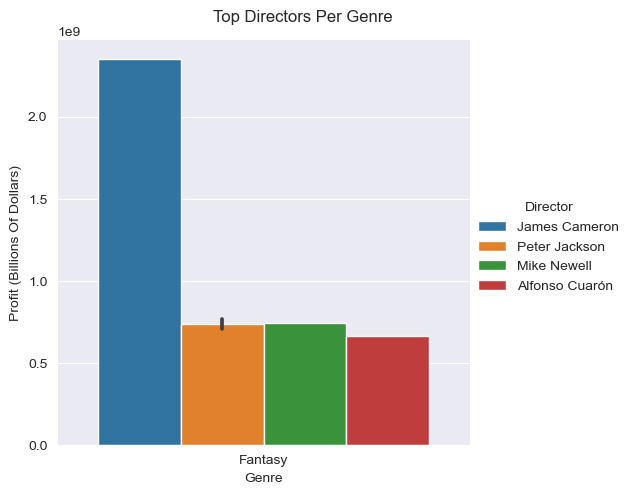

In [265]:
cat = sns.catplot(data=e_v2, x='Genre', y='Profit', hue='Director', kind="bar", palette='tab10')
cat.fig.subplots_adjust(top=0.92)
cat.fig.suptitle('Top Directors Per Genre')
cat.set_ylabels('Profit (Billions Of Dollars)')

plt.show()

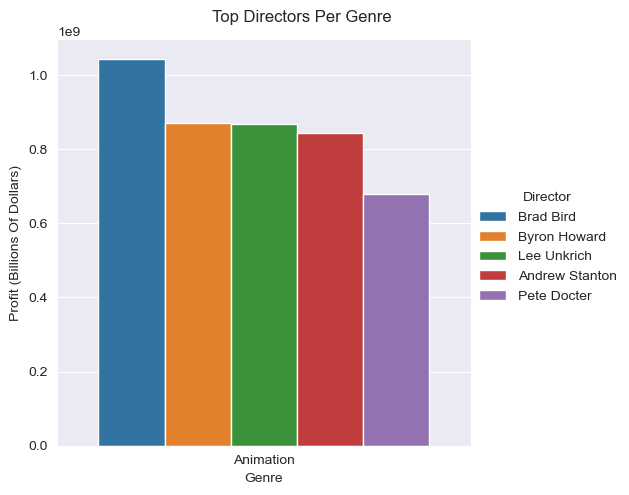

In [266]:
cat = sns.catplot(data=f_v2, x='Genre', y='Profit', hue='Director', kind="bar", palette='tab10')
cat.fig.subplots_adjust(top=0.92)
cat.fig.suptitle('Top Directors Per Genre')
cat.set_ylabels('Profit (Billions Of Dollars)')

plt.show()

### The findings indicate that for action, fantasy and adventure movies James Cameron should be hired as director. For Animation movies Brad Bird should be hired, and for Family movies Microsoft should recruit Mike Newell

## Conclusion


### I would suggest that Microsoft the following types of movies.

Movie Option #1
* A fantasy movie directed by James Cameron.
* Potential profit of $2,351,345,279

Movie Option #2
* A animation movie directed by Brad Bird.
* Potential profit of $1,042,520,711

Movie Option #3
* A family movie directed by Mike Newell.
* Potential profit of $747,099,794